<a href="https://colab.research.google.com/github/d823944/ML100-Days/blob/master/Homework/Day078_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
# Use Colab

'\nYour code here\n'

In [2]:
import os
import keras

# Try to enable GPU (optional)


Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    original_shape = x.shape
    x = x.reshape((len(x), -1))
    x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
    if not flatten:
        x = x.reshape(original_shape)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp((x_train.shape[1],))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 1.7159 - acc: 0.3884 - val_loss: 1.5600 - val_acc: 0.4503
Epoch 2/100
 - 3s - loss: 1.4775 - acc: 0.4775 - val_loss: 1.4360 - val_acc: 0.4942
Epoch 3/100
 - 3s - loss: 1.3586 - acc: 0.5215 - val_loss: 1.4224 - val_acc: 0.4986
Epoch 4/100
 - 3s - loss: 1.2630 - acc: 0.5557 - val_loss: 1.3886 - val_acc: 0.5105
Epoch 5/100
 - 3s - loss: 1.1856 - acc: 0.5822 - val_loss: 1.3774 - val_acc: 0.5212
Epoch 6/100
 - 3s - loss: 1.1078 - acc: 0.6078 - val_loss: 1.3902 - val_acc: 0.5235
Epoch 7/100
 - 3s - loss: 1.0259 - acc: 0.6385 - val_loss: 1.3985 - val_acc: 0.5297
Epoch 8/100
 - 3s - loss: 0.9562 - acc: 0.6623 - val_loss: 1.3987 - val_acc: 0.5313
Epoch 9/100
 - 3s - loss: 0.8891 - acc: 0.6862 - val_loss: 1.4473 - val_acc: 0.5330
Epoch 10/100
 - 3s - loss: 0.8215 - acc: 0.7095 - val_loss: 1.4976 - val_acc: 0.5371
Epoch 11/100
 - 3s - loss: 0.7530 - acc: 0.7331 - val_loss: 1

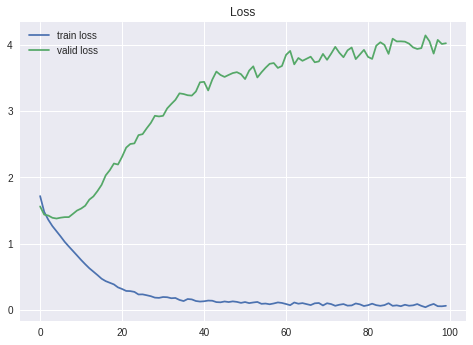

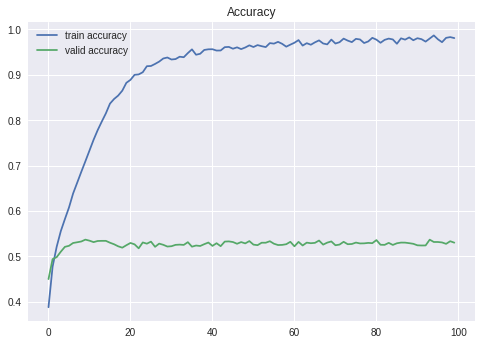

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()